## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "atributos", como sexo e classe dos passageiros. Você também pode usar a engenharia de atributos para criar novos atributos.

Parte do conjunto de treino deve ser usado para ver o desempenho do seu modelo em dados não vistos. 

Para o conjunto de testes, não é fornecido o rótulo de classe para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic. O resultado deve ser submetido na plataforma Kaggle (opção **submit predictions**) a fim de calcular a acurácia. 

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Importando e visualizando os dados

In [874]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
    from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [875]:
dt = pd.read_csv('train.csv')

In [876]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [877]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Tratamento dos dados

In [878]:
dt.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [879]:
dt['Sex'].unique()

array(['male', 'female'], dtype=object)

In [880]:
dt['Sex'] = [0 if i == 'male' else 1 for i in dt['Sex']]

In [881]:
# Fill with the mean?

mean = dt['Age'].mean()
dt['Age'].fillna(value=mean, inplace=True)

# Drop rows with NaN Ages?

#dt.dropna(inplace=True)

In [882]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [883]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## Construção do modelo

In [884]:
labels = dt.values[:, 0]
features = dt.values[:, 1:]

In [885]:
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

In [886]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [887]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8100558659217877

In [888]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85       110
         1.0       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [889]:
model.feature_importances_

array([0.21604351, 0.63548937, 0.09015189, 0.01335287, 0.        ,
       0.04496236])

[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.25, 0.625, 'x[2] <= 3.5\ngini = 0.302\nsamples = 459\nvalue = [374, 85]'),
 Text(0.125, 0.375, 'x[3] <= 2.5\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.375, 'x[0] <= 1.5\ngini = 0.272\nsamples = 444\nvalue = [372, 72]'),
 Text(0.3125, 0.125, 'gini = 0.462\nsamples = 91\nvalue = [58, 33]'),
 Text(0.4375, 0.125, 'gini = 0.197\nsamples = 353\nvalue = [314, 39]'),
 Text(0.75, 0.625, 'x[0] <= 2.5\ngini = 0.382\nsamples = 253\nvalue = [65, 188]'),
 Text(0.625, 0.375, 'x[5] <= 28.856\ngini = 0.097\nsamples = 137\nvalue = [7, 130]'),
 Text(0.5625, 0.125, 'gini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(0.6875, 0.125, 'gini = 0.024\nsamples = 83\nvalue = [1, 82]'),
 Text(0.875, 0.375, 'x[5] <= 23.35\ngini = 0.5\nsamples = 116\nvalue = [58, 58]'),
 Te

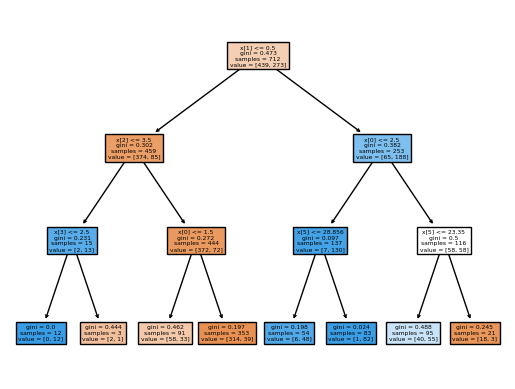

In [890]:
tree.plot_tree(model, filled=True)